# Проект: вариант 2
## Задание 1. A/B–тестирование

### 1.1 Условие

    Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

### 1.2 Входные данные

#### В качестве входных данных Вы имеете 4 csv-файла:

    groups.csv - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 
    groups_add.csv - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
    active_studs.csv - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
    checks.csv - файл с информацией об оплатах пользователей в дни проведения эксперимента. 


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats

In [2]:
sns.set(palette='Set2', rc={'figure.figsize': (11, 4.5),
            "axes.grid": True,
            'grid.linestyle': (0, (1, 8)),
            'axes.grid.axis': 'both',
            "grid.color": "lightgrey", 
            'axes.facecolor': 'white'})
color = sns.color_palette(palette='Set2')[0]

In [3]:
groups = pd.read_csv('groups.csv', sep=';')
group_add = pd.read_csv('group_add.csv', sep=',')
active_studs = pd.read_csv('active_studs.csv')
checks = pd.read_csv('checks.csv', sep=';')

In [4]:
def desc(df):
    """ Функция выведет основные описательные статистики, а также типы данных и количество уникальных значений """
    ret_df = pd.concat([pd.DataFrame(
        df.describe(include='all')).T,
        pd.DataFrame([df.nunique().values, df.isna().sum().values], index=['nunique','isna']).T.set_index(df.columns),   
        pd.DataFrame(df.dtypes, columns=['dtypes'])],axis=1
                                      )
    return ret_df.replace(np.nan, '')

In [5]:
desc(groups)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nunique,isna,dtypes
id,74484.0,,,,2133751.548037,1531422.901387,1489.0,917498.0,1667190.5,3322954.75,5694419.0,74484,0,int64
grp,74484.0,2,B,59813,,,,,,,,2,0,object


In [6]:
desc(group_add)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nunique,isna,dtypes
id,92.0,,,,27964058.206522,61416046.259854,5694584.0,5712349.25,5729634.0,5825645.75,201067659.0,92,0,int64
grp,92.0,2,B,70,,,,,,,,2,0,object


In [7]:
desc(active_studs)

,count,mean,std,min,25%,50%,75%,max,nunique,isna,dtypes
student_id,8341.0,2.448547e+06,1.564978e+06,1627.0,1118405.0,2094192.0,3638877.0,5951797.0,8341,0,int64


In [8]:
desc(checks)

,count,mean,std,min,25%,50%,75%,max,nunique,isna,dtypes
student_id,541.0,2.514772e+06,1.726839e+06,1627.0,987129.0,2526021.0,3993249.0,5740903.0,541,0,int64
rev,541.0,1.059752e+03,7.627124e+02,199.0,290.0,840.0,1900.0,4650.0,39,0,float64


#### 1.4 Требования к ответу

    1 При выполнении тестового задания необходимо использовать язык программирования Python. 
    2 В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными. 
    3 Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

In [9]:
groups.rename(columns={'id': 'student_id'}, inplace=True)

In [10]:
ab_t = active_studs.merge(checks, on='student_id', how='left').fillna(0)

In [11]:
groups.rename(columns={'id': 'student_id'}, inplace=True)
ab_t.rename(columns={'rev': 'revenue'}, inplace=True)
ab_t = ab_t.merge(groups, on='student_id', how='inner')

In [12]:
desc(ab_t)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nunique,isna,dtypes
student_id,8328.0,,,,2443348.485831,1560650.770992,1627.0,1117583.0,2084543.0,3628663.75,5690284.0,8328,0,int64
revenue,8328.0,,,,55.943084,309.195015,0.0,0.0,0.0,0.0,4650.0,39,0,float64
grp,8328.0,2,B,6793,,,,,,,,2,0,object


### Будем считать:
    Пользователей в groups это все пользователи, попавшие в сплит систему (даже если они не заходили на сайт во время проведения аб теста)
    
    active_studs - информацией о пользователях, которые зашли на платформу в дни проведения эксперимента.
    
    checks - информацией обо всех оплатах пользователей в дни проведения эксперимента.

# А – контроль, B – тестовая группа (пилот)

In [13]:
a = ab_t[ab_t['grp'] == 'A'].revenue

In [14]:
b = ab_t[ab_t['grp'] == 'B'].revenue

Text(0.5, 1.0, 'Распределение пользователей в группе B, всего 6793')

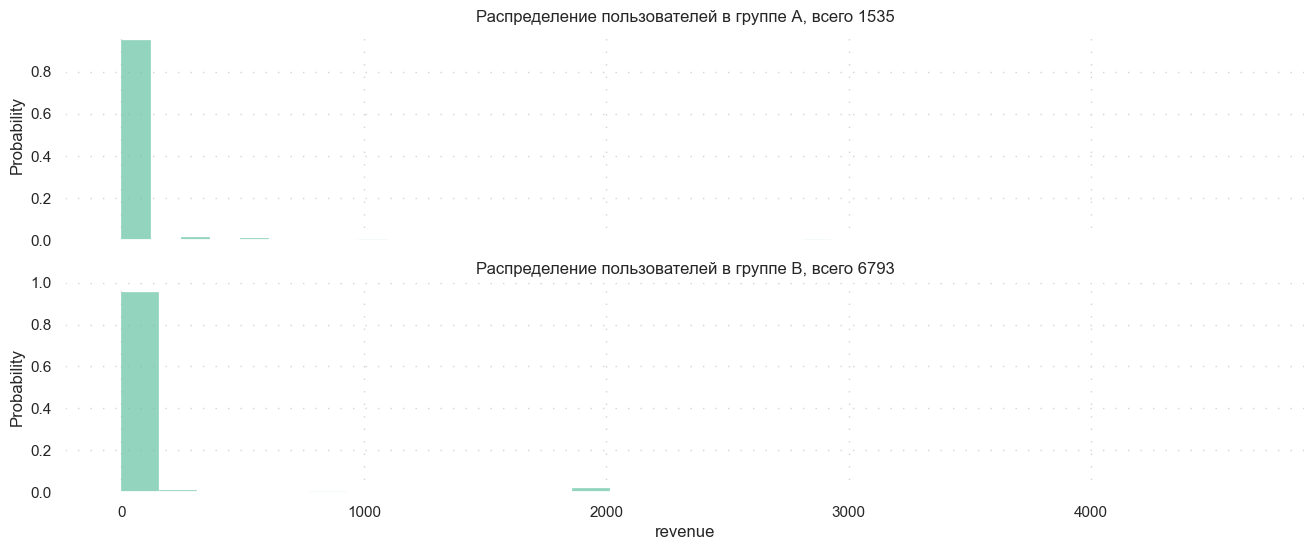

In [15]:
f, ax = plt.subplots(2, 1, figsize=(16,6), sharex=True)

sns.histplot(a, bins=30, stat='probability', ax=ax[0], alpha=0.7, linewidth=0.2, color=color)
ax[0].set_title(f'Распределение пользователей в группе А, всего {len(a)}')
ax[0].set(xlabel=None)

sns.histplot(b, bins=30, stat='probability', ax=ax[1], alpha=0.7, linewidth=0.2, color=color)
ax[1].set_title(f'Распределение пользователей в группе B, всего {len(b)}')

In [16]:
def first_look(a,b):   
    f, ax = plt.subplots(2, 1, figsize=(16,6), sharex=True)
    sns.histplot(a[a>0], bins=30, stat='probability', ax=ax[0], alpha=0.7,linewidth=0.2, color=color)
    ax[0].set_title(f'Распределение покупателей в группе А, всего {len(a[a>0])}')
    ax[0].set(xlabel=None)

    q_a = pd.Series(a[a>0]).quantile([0.25, 0.5, 0.75]).round(2).to_list()
    ax[0].axvline(np.mean(a[a>0]), color='b', label='mean')
    [ax[0].axvline(i, linestyle='--', color='r') for i in q_a]
    ax[0].legend(['mean','quartiles'], loc='upper right' )
    print(f'quartiles A = {q_a}, mean = {np.mean(a[a>0]):.5}')

    sns.histplot(b[b>0], bins=30, stat='probability', ax=ax[1], alpha=0.7,linewidth=0.2, color=color)
    ax[1].set_title(f'Распределение покупателей в группе B, всего {len(b[b>0])}',y=0.95)

    q_b = pd.Series(b[b>0]).quantile([0.25, 0.5, 0.75]).round(2).to_list()
    ax[1].axvline(np.mean(b[b>0]), color='b', label='mean')
    [ax[1].axvline(i, linestyle='--', color='r') for i in q_b]
    ax[1].legend(['mean','quartiles'], loc='upper right' )
    print(f'quartiles B = {q_b}, mean = {np.mean(b[b>0]):.5}')
    
    f, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    ax[0].set(xticklabels=[])
    ax[1].set(xticklabels=[])

    q_a = pd.Series(a[a>0]).quantile([0.25, 0.5, 0.75]).round(2).to_list()
    ax[0].axhline(np.mean(a[a>0]), color='b', label='mean')
    [ax[0].axhline(i, linestyle='--', color='r', alpha = 0.6) for i in q_a]

    q_b = pd.Series(b[b>0]).quantile([0.25,0.5,0.75]).round(2).to_list()
    ax[1].axhline(np.mean(b[b>0]), color='b', label='mean')
    [ax[1].axhline(i, linestyle='--', color='r', alpha = 0.6) for i in q_b]

    ax[0].set_title(f'Распределение покупок в группе А',y=0.95)
    ax[1].set_title(f'Распределение покупок в группе В',y=0.95)

    sns.scatterplot(x= np.random.rand(len(a[a>0]))*10, y= a[a>0], ax=ax[0])
    sns.scatterplot(x= np.random.rand(len(b[b>0]))*10, y= b[b>0], ax=ax[1])
    ax[0].legend(['mean', 'quartiles'],loc='upper right')
    ax[1].legend(['mean', 'quartiles'],loc='upper right')

quartiles A = [290.0, 585.0, 1114.75], mean = 933.59
quartiles B = [489.0, 1140.0, 1900.0], mean = 1255.8


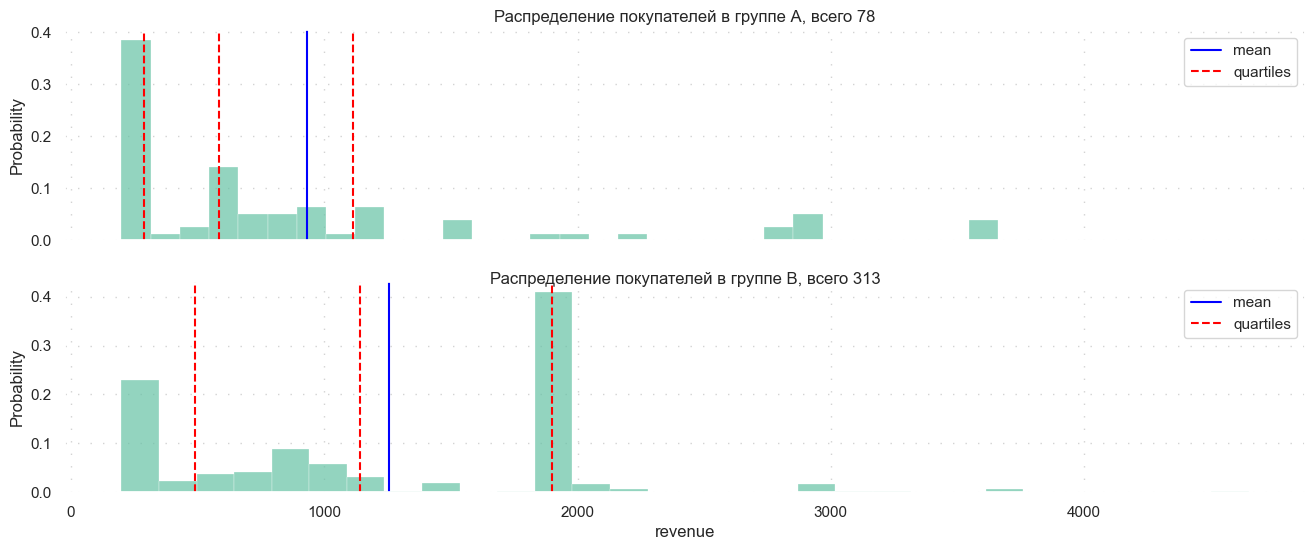

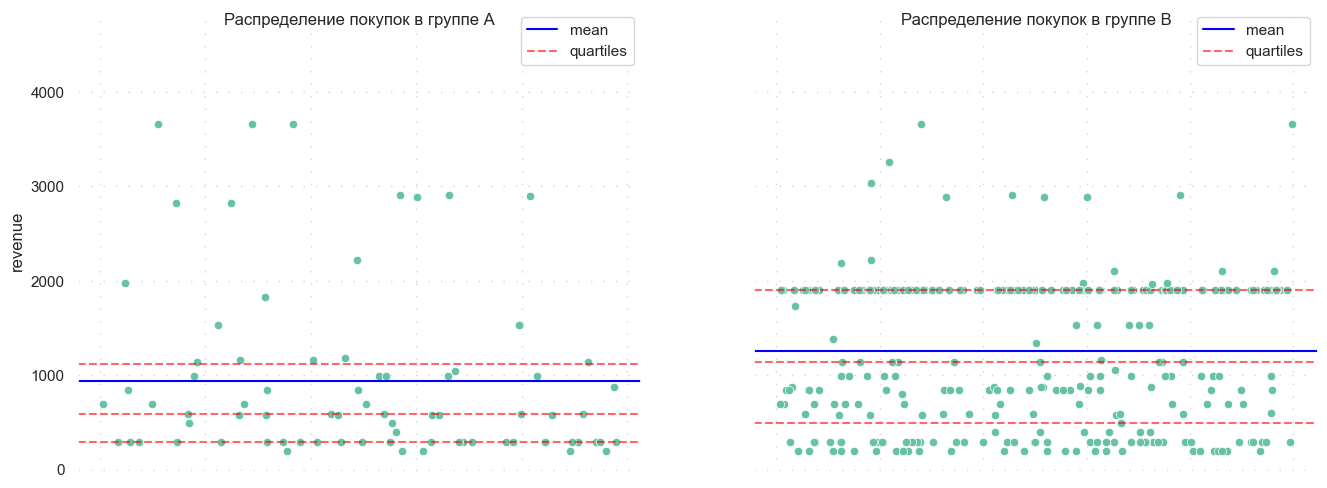

In [17]:
first_look(a,b)

### Пояснение к графикам:
    Каждая точка - это отдельная покупка, слева контрольная группа, справа пилот.
    Синяя линяя это средний чек, красными линиями отмечены квартили 
    Оси для удобства объединены (на первом по вертикали, на втором по горизонтали)

## 1.3.2 Имеются ли различия в показателях и с чем они могут быть связаны?
    Средние и квартили сильно отличаются из-за большого скопления покупок в пилотной группе в районе 1900 у.е.
    В остальном распределения визуально схожи. Посмотрим, что будет если убрать покупки за 1900 из группы В

quartiles A = [290.0, 585.0, 1114.75], mean = 933.59
quartiles B = [290.0, 690.0, 990.0], mean = 815.99


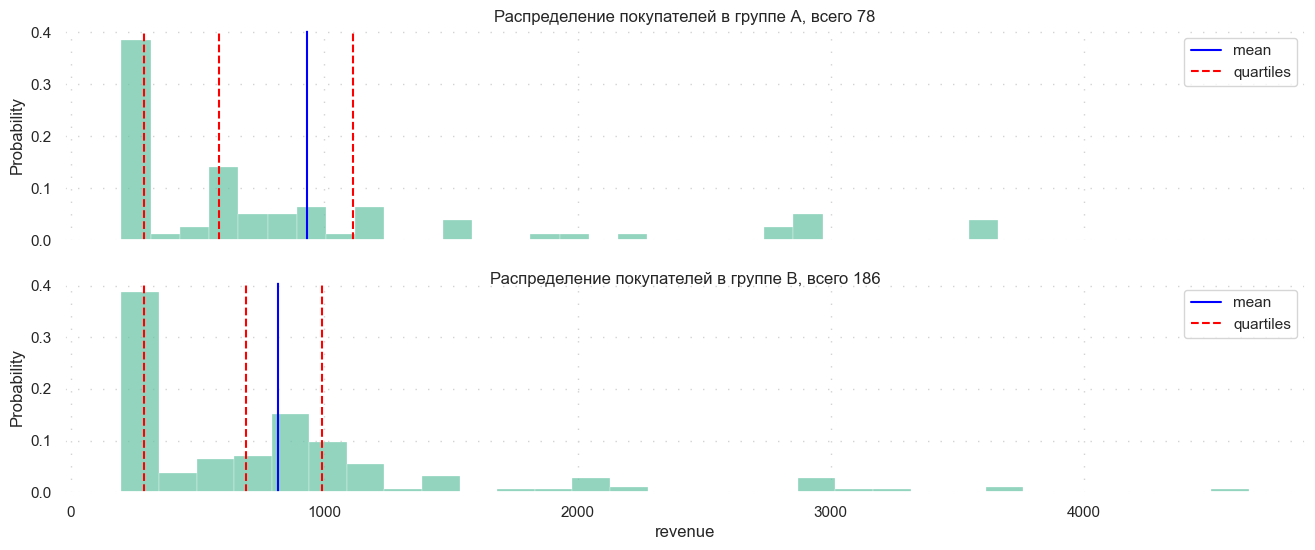

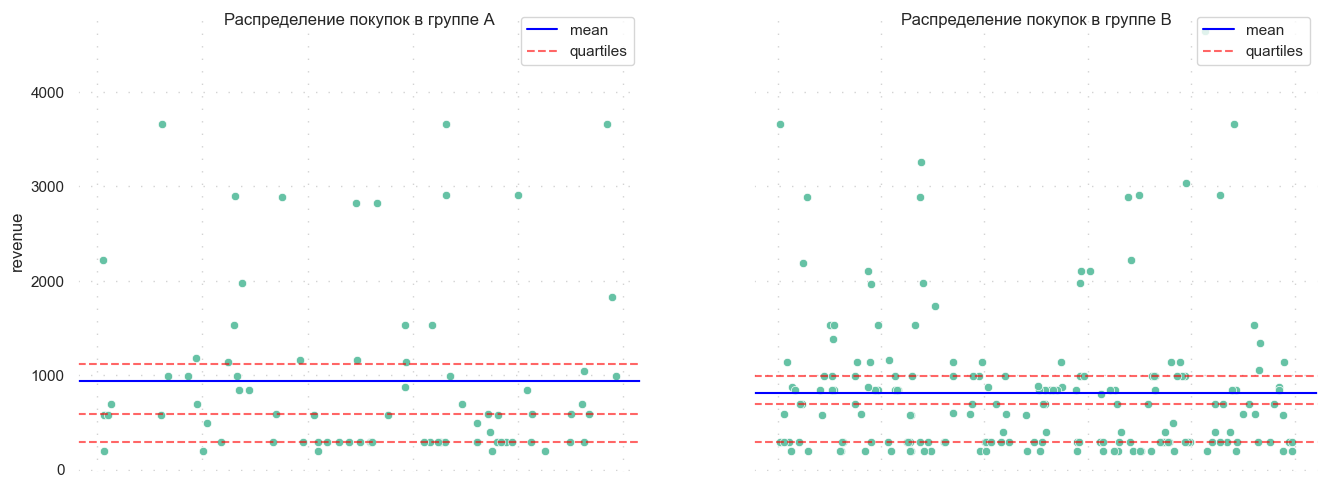

In [18]:
first_look(a,b[(b < 1900)|(b > 1901)])

#### Как и ожидалось, за исключением большого числа покупок за ~1900 данные, распределения в других группах похожи. 
    
#### Хотелось бы узнать чем конкретно было вызваны эти различия в поведении покупателей возможно:
    Группе "В" было предложено какое-то специальное предложение за 1900 у.е, а группе "А" нет.
    Или в группе В с измененной механикой оплаты были добавлены какие-то рекомендации к покупке
Но за неимением деталей мы можем проверить только статистическую возможность получения таких отличий в двух группах.



### Рассчет вероятности 127 одинаковых покупок  по формуле вероятностей Бернулли 

<AxesSubplot: xlabel='revenue'>

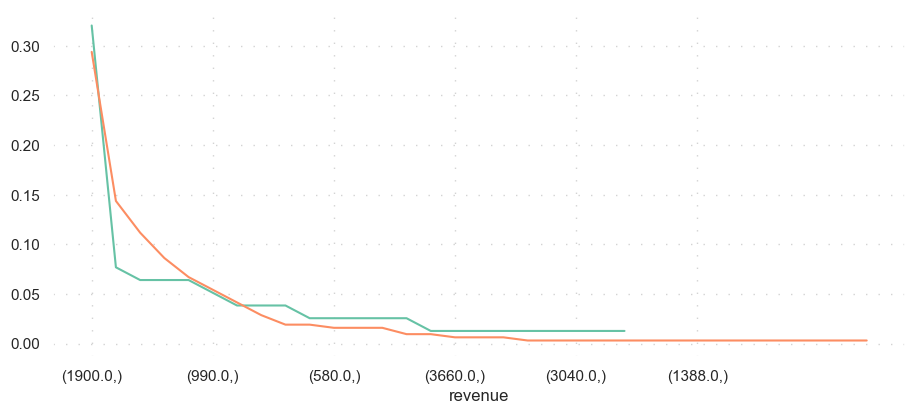

In [19]:
pd.DataFrame(a[a>0]).value_counts(normalize=True).plot()#.iloc[0]
pd.DataFrame(b[b>0]).value_counts(normalize=True).plot()#.iloc[0]

    Предроложим что наши пользователи распределенны равномерно и каждая из выборок репрезентативна.
    Тогда вероятность получить самое частое значение  в группе А будет:
    (количество покупок за 290.0 (25) / на все покупки (78)) p = 0.32, а в группе В (127 / 313) p = 0.40

In [20]:
import scipy

n = 313      # кол-во покупок
m = 127      # колво покупок за ~1900
p = 25 / 78  # вероятность самого частого значения из группы А
q = 1 - p    # сумма вероятностей всех других уникальных значений

p_val = scipy.special.comb(n,m) * (p)**m * (q)**(n-m)
print(f'Предположим что в группе "А" будет 313 покупок (с тем же распределением), тогда вероятность того что {m} человек из {n} совершат покупки на одну и туже сумму = {p_val:.4}')

Предположим что в группе "А" будет 313 покупок (с тем же распределением), тогда вероятность того что 127 человек из 313 совершат покупки на одну и туже сумму = 0.0003038


## 1.3 Вопросы

### Предлагаем Вам ответить на следующие вопросы:

    1 На какие метрики Вы смотрите в ходе анализа и почему?
    2 Имеются ли различия в показателях и с чем они могут быть связаны?
    3 Являются ли эти различия статистически значимыми?
    4 Стоит ли запускать новую механику на всех пользователей?
    
Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

### 1.3.1 На какие метрики Вы смотрите в ходе анализа и почему?
### Изменения в механике оплаты остаются для нас загадкой, что именно было изменено не известно.

    Возможно, из воронки в покупку убрали лишние шаги (что могло позитивно сказаться на конверсии) 
    или в момент оплаты стали рекомендовать доп.услуги (что могло повысить средний чек)
    
Так как конкретики нет, будем проверять все что имеем, конверсию, доход на платящего и простого пользователя, ещё посмотрим составные этих метрик по отдельности, такие как количество пользователей и общая прибыль.


    Конверсия основная метрика (в случае изменений механики), ARPPU второстепенная 
    ARPPU основная метрика (в случае изменений связанных допродажами), CR второстепенная

## Функция для расчета метрик

In [21]:
def metrics(path = None):
    
    groups = pd.read_csv('groups.csv', sep=';', names=['st_id','test_grp'], header=0)
    active_studs = pd.read_csv('active_studs.csv', names=['st_id'], header=0)
    checks = pd.read_csv('checks.csv', sep=';', names=['st_id','rev'], header=0)

    groups['test_grp'] = groups.test_grp.apply(lambda x : 'pilot' if x == 'B' else 'control')

    # А – контроль, B – целевая группа (pilot)
    if path:
        if path == True:
            path = 'group_add.csv'
        groups_add = pd.read_csv(path, sep=',', names=['st_id','test_grp'], header=0)
        groups_add['test_grp'] = groups_add.test_grp.apply(lambda x : 'pilot' if x == 'B'or x == 'pilot' else 'control')
        df = pd.concat([groups_add, groups])
    else:
        df = groups
        
    df.drop_duplicates()

    df.loc[df.st_id.isin(active_studs.st_id),'is_active'] = 1
    df.fillna(0,inplace=True)

    df = pd.merge(df, checks.groupby('st_id',as_index=False).rev.sum(), on = 'st_id', how='left').fillna(0)

    df.loc[(df.is_active == 1)&(df.rev > 0),'active_rev'] = df[(df.is_active == 1)&(df.rev > 0)].rev
    df.fillna(0,inplace=True)

    df_temp = df.groupby('test_grp',as_index=False).agg(total_studs=('st_id','nunique'), 
                                                       active_studs=('is_active','sum'),
                                                       buys=('rev', lambda x : sum(x > 0)), 
                                                       active_buys=('active_rev', lambda x : sum(x > 0)), 
                                                       total_rev=('rev','sum'), 
                                                       active_rev=('active_rev','sum')
                                               )
    CR = pd.DataFrame(df_temp.active_buys /  df_temp.active_studs, columns=['CR_active'])
    ARPU = pd.DataFrame(df_temp.active_rev /  df_temp.active_studs, columns=['ARPAU'])
    ARPPU = pd.DataFrame(df_temp.active_rev /  df_temp.active_buys, columns=['ARPPAU'])
    return pd.concat([df_temp,CR,ARPU,ARPPU], axis=1)

In [22]:
metric = metrics()

,test_grp,total_studs,active_studs,buys,active_buys,total_rev,active_rev,CR_active,ARPAU,ARPPAU
0,control,14671,1535.0,107,78,92096.0000,72820.0000,0.050814,47.439739,933.589744
1,pilot,59813,6793.0,433,313,479330.0036,393074.0035,0.046077,57.864567,1255.827487


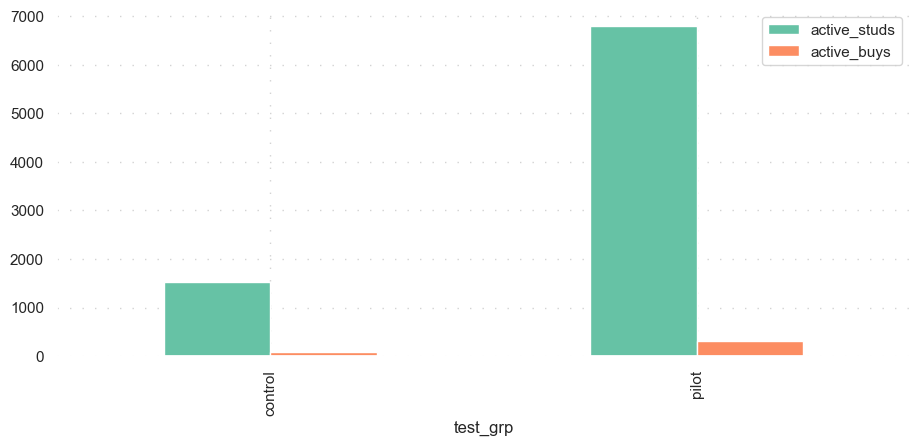

In [23]:
metric[['test_grp', 'active_studs', 'active_buys']].set_index('test_grp').plot.bar()
metric

## Плохая система сплитования, дисбаланс выборок. 

В тестовой группе значительно больше пользователей, что усложняет анализ и может быть опасно в случае негативных изменений механики оплаты.

In [24]:
#сохраним CR в отдельнные переменные
a_cr = [1 if i > 0 else 0 for i in ab_t[(ab_t.grp == 'A')].revenue]
b_cr = [1 if i > 0 else 0 for i in ab_t[(ab_t.grp == 'B')].revenue]

## Проверим данные на нормальность распределений.
    Воспользуемся тестом Шапиро-Уилка, а так же посмотрим на распределение квантилей, асимметрию и эксцесс распределения средних 


In [25]:
def is_norm(population, metric_name, data = False):
    sample_means_control = []
    sample_means_target = []
    for i in range(5000):
          sample_control = population[population['grp'] == 'A']['revenue'].sample(frac=1, replace=True)
          sample_target = population[population['grp'] == 'B']['revenue'].sample(frac=1, replace=True)
          sample_means_control.append(sample_control.mean())
          sample_means_target.append(sample_target.mean())


    f, ax = plt.subplots(1, 2, figsize=(15,3), sharex=True)
    ax[0].hist(sample_means_control, 30, density=True)
    ax[0].set_title('Распределение средних '+metric_name+' в группе A')

    ax[1].hist(sample_means_target, 30, density=True)
    ax[1].set_title('Распределение средних '+metric_name+' в группе B')


    plt.figure(figsize=(20,8))
    plt.subplot(2,2,1)
    stats.probplot(sample_means_control, dist="norm", plot=plt)
    plt.subplot(2,2,2)
    stats.probplot(sample_means_target, dist="norm", plot=plt)


    np.random.seed(42)
    sp = stats.shapiro(sample_means_control)
    concl = '=> нормальное' if sp[1]>0.05 else '=> не нормально' 
    print('Тест на нормальность распределения средних A группы: W = %.3f' % sp[0], ', p-value = %.3f' % sp[1], concl)

    sp = stats.shapiro(sample_means_target)
    concl = '=> нормальное' if sp[1]>0.05 else '=> не нормально' 
    print('Тест на нормальность распределения средних B группы: W = %.3f' % sp[0], ', p-value = %.3f' % sp[1], concl)
    
    if data:
        return sample_means_control, sample_means_target

In [26]:
changes = pd.DataFrame([ np.round(list((metric.iloc[1,1:].values - metric.iloc[0,1:].values)/(metric.iloc[0,1:].values)),4)*100 ], columns=list(metric.columns[1:]))
changes = pd.concat([metric, pd.concat([
    pd.DataFrame(['Изменения теста к контролю в %'],columns=['test_grp']) , 
    changes], axis=1)], axis=0)

In [27]:
changes

,test_grp,total_studs,active_studs,buys,active_buys,total_rev,active_rev,CR_active,ARPAU,ARPPAU
0,control,14671.0,1535.00,107.00,78.00,92096.0000,72820.0000,0.050814,47.439739,933.589744
1,pilot,59813.0,6793.00,433.00,313.00,479330.0036,393074.0035,0.046077,57.864567,1255.827487
0,Изменения теста к контролю в %,307.7,342.54,304.67,301.28,420.4700,439.7900,-9.320000,21.970000,34.520000


In [28]:
print(f'Разница средних CR  = {( (np.mean(b_cr) - (np.mean(a_cr)) ) / np.mean(a_cr))*100:.4}%')

Разница средних CR  = -9.323%


# Конверсия упала на 9.3%

### Вероятность того что конверсии примут такие или ещё более сильные отклонения.

    H0: Конверсии в греппе А и В различаются не значимо:
    H1: Различия в конверсиях статистически значимы:

### Для проверки гипотез воспользуемся непараметрическим критерием согласия Пирсона хи квадрат и бутстреп

Принцип работы непараметрических критериев в том что бы предположить что наша выборка принадлежит какому-то теоретическому распределению (в нашем случае распределению с параметрами группы А) и посчитать вероятность отклонения от ожидаемого распределения

В случае Хи квадрат мы проверям гипотезу о том что в группе В соотношение покупателей и тех кто ничего не купил такое же как и в группе А

Требования к данным: Каждое событие в выборке должно встречаться не меньше 10 раз 

In [29]:
# Chi-Square test of goodness
# H0 hypothesis that the categorical data has the given frequencies

In [30]:
A_obs =[sum(a_cr), len(a_cr)-sum(a_cr)]
B_obs =[sum(b_cr), len(b_cr)-sum(b_cr)]
tab = [A_obs, B_obs]
tab

[[78, 1457], [313, 6480]]

### Н0: Мы предполагаемы что вероятность покупки в группе В такая же как и в группе А
Для того что бы это проверить нам нужно сделать выборку того же размера что и выборка В, но ожидаемой вероятности, то есть с вероятностью как в группе А

In [31]:
A_prob = sum(a_cr) /  len(a_cr) #вероятность в А (конверсия)
B_exp = [(len(b_cr) * A_prob), len(b_cr) - (len(b_cr) * A_prob)] #одижаймое соотношение группы "В" при вероятности как в "А"

In [32]:
A_obs[0] / sum(A_obs), B_exp[0] / sum(B_exp)

(0.050814332247557006, 0.050814332247557006)

In [33]:
B_obs, B_exp

([313, 6480], [345.1817589576547, 6447.818241042345])

In [34]:
stats.chisquare(f_obs=B_obs, f_exp=B_exp)

Power_divergenceResult(statistic=3.160971250212104, pvalue=0.07541830116480787)

## Вывод:
    p-value=0.075 > 0.5
    Мы не можем утверждать что конверсия в группе В значимо отличается от конверсии в группе А

In [35]:
#stats.chi2_contingency([tab])


### Требования к бутстрепу
    Чтобы оценка стандартного отклонения была несмещённой, необходимо генерировать выборки такого же размера, как и размер
    исходной выборки, это связно с тем что наша выборка должно сохраниться исходное соотношение для каждой случайной величины.
    Т.е. при изменении n или m оценка доли не будет описывать генеральную долю m / n != M / N в ГС

    Количество итераций бутстрепа рекомендуется брать в диапазоне от 1000 до 10000. Этого должно хватить для получения достаточно точных результатов. Из теоремы Чебышова (закон больших чисел) следует что при достаточно большом 
    n, среднее арифметическое случайных величин сходится по вероятности к среднему арифметическому их мат ожиданий. Это актуально как для размера выборок (на что мы можем повлиять собирая больше данных), так и для количества бутстрапированных под выборок.


### Алгоритм проверки гипотез о равенстве двух произвольных метрик с помощью бутстрепа:

    Генерируем пару подвыборок того же размера из исходных данных контрольной и экспериментальной групп;

    Считаем метрики для каждой из групп;

    Вычисляем разность метрик, сохраняем полученное значение;

    Повторяем шаги 1-3 от ~5000 раз;

    Строим доверительный интервал с уровнем значимости alpha;

    Если 0 не принадлежит ДИ, то отличия статистически значимы на уровне значимости alpha, иначе нет. 

In [36]:
def get_p_laplas(data):
    '''интеграл вероятности Лапласа'''
    t = abs(np.mean(data) / np.std(data))
    from scipy.special import erf
    Phi = lambda x: erf(x/2**0.5)/2
    return 1 - (Phi(t)*2)

In [37]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 5000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in range(boot_it): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
    alpha = 1 - bootstrap_conf_level
    
    left_quant = (alpha)/2
    right_quant = 1 - (alpha) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = stats.norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = stats.norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
    
    
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor(color)
    
    plt.axvline(quants.values[0][0],linestyle='--', label ='confidence interval')
    plt.axvline(quants.values[1][0],linestyle='--')

    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.legend()
    plt.show()


    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

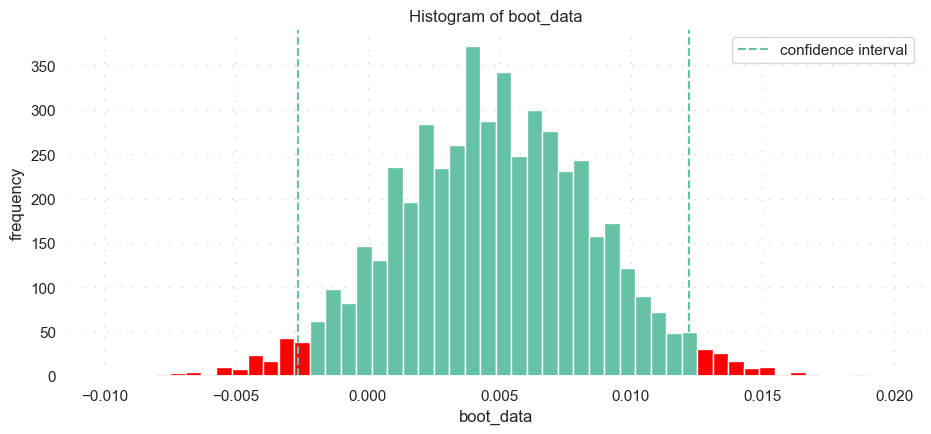

In [38]:
b_data = get_bootstrap(pd.Series(a_cr), pd.Series(b_cr))

### H0 : 95%ый доверительный интервал разницы конверсий содержит 0

95-процентный доверительный интервал разности средних не содержит нуля, то различия статистически
значимы; если этот интервал содержит ноль, то различия статистически не значимы.

In [39]:
stats.shapiro(b_data['boot_data'])

ShapiroResult(statistic=0.9996533393859863, pvalue=0.5653178095817566)

### 1.3.3 Являются ли эти различия конверсий статистически значимыми?

Разницы средних приняли нормальное распределение, следовательно мы можем расчитать вероятность таких отклонений в среднем от нуля

Что бы посчитать вероятность такого отклонения воспользуемся кумулятивной функцией нормального распределения Гаусса CDF cо средним в "0" и стандартным отклонением разницы средних полученным выше N(0, S)

Полученную вероятность умножим на 2 для двухсторонней оценки


In [40]:
print(f"P-value =  {b_data['p_value']:.4}")

P-value =  0.2043


## Вывод:
    P-value значительно больше нашего уровня значимости 0.05, это говорит о том что такие различия конверсий возможны без каких либо изменений в механике оплаты

### Оценим второстепенные метрики

In [41]:
changes

,test_grp,total_studs,active_studs,buys,active_buys,total_rev,active_rev,CR_active,ARPAU,ARPPAU
0,control,14671.0,1535.00,107.00,78.00,92096.0000,72820.0000,0.050814,47.439739,933.589744
1,pilot,59813.0,6793.00,433.00,313.00,479330.0036,393074.0035,0.046077,57.864567,1255.827487
0,Изменения теста к контролю в %,307.7,342.54,304.67,301.28,420.4700,439.7900,-9.320000,21.970000,34.520000


In [42]:
ARPPAU_a = ab_t[(ab_t.grp == 'A') & (ab_t.revenue > 0)].revenue
ARPPAU_b = ab_t[(ab_t.grp == 'B')& (ab_t.revenue > 0)].revenue

In [43]:
print(f'Изменение ARPAU = {(( metric.ARPAU[1] - metric.ARPAU[0]) / metric.ARPAU[0])*100:.4}%')
print(f'Изменение ARPPAU = {(( metric.ARPPAU[1] - metric.ARPPAU[0]) / metric.ARPPAU[0])*100:.4}%')

Изменение ARPAU = 21.97%
Изменение ARPPAU = 34.52%


### ARPPAU (платящие)

In [44]:
desc(pd.DataFrame(ARPPAU_a))

,count,mean,std,min,25%,50%,75%,max,nunique,isna,dtypes
revenue,78.0,933.589744,919.932711,199.0,290.0,585.0,1114.75,3660.0,23,0,float64


In [45]:
desc(pd.DataFrame(ARPPAU_b))

,count,mean,std,min,25%,50%,75%,max,nunique,isna,dtypes
revenue,313.0,1255.827487,791.293377,199.0,489.0,1140.0,1900.0,4650.0,33,0,float64


Тест на нормальность распределения средних A группы: W = 0.997 , p-value = 0.000 => не нормально
Тест на нормальность распределения средних B группы: W = 1.000 , p-value = 0.504 => нормальное


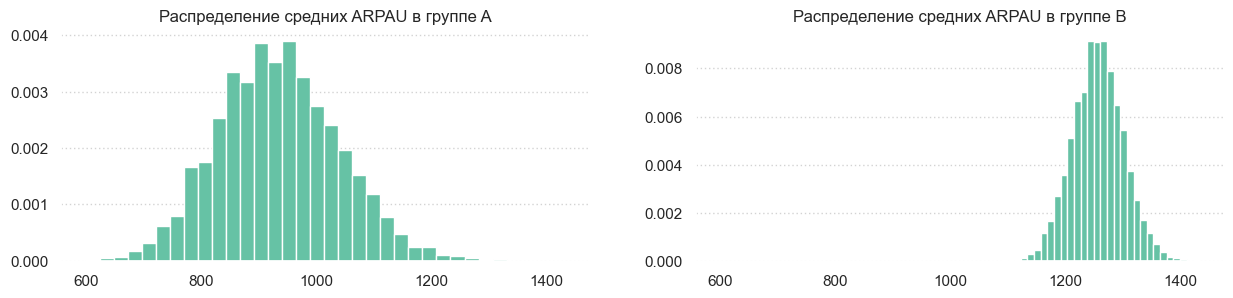

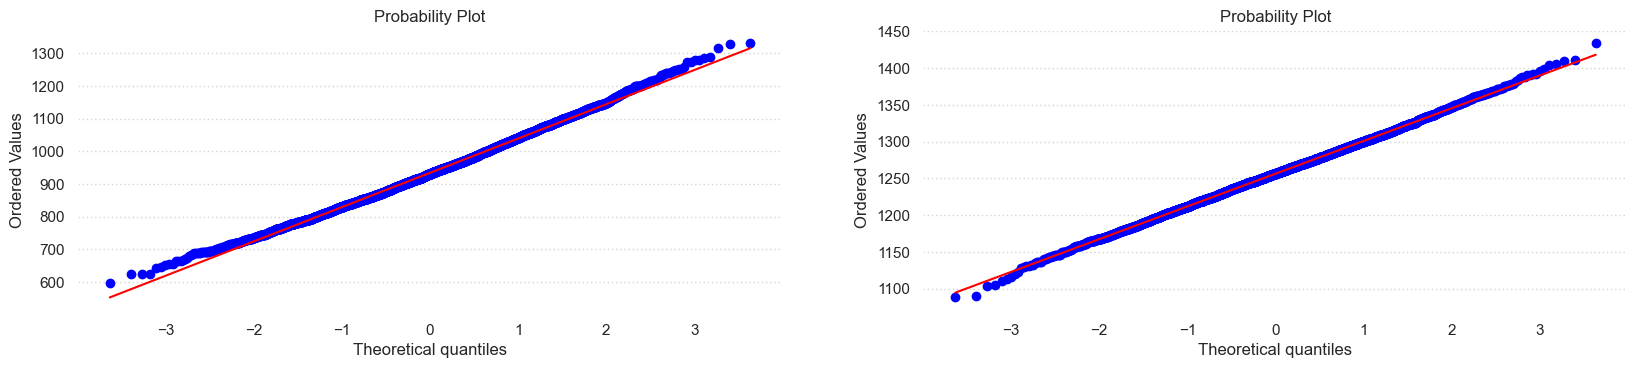

In [78]:
np.random.seed(42)
population_ARPAU = ab_t[ab_t['revenue'] > 0].copy()
population_ARPAU['revenue'] = population_ARPAU.revenue
extr_a, extr_b = is_norm(population_ARPAU, metric_name = 'ARPAU', data=True)

### Критерий Шапиро-Уилка говорит о том что ARPPAU из выборок с повторениями распределились не нормально
Посмотрим детально на асимметрию и эксцесс с помощью центральных моментов 

In [79]:
#асимметрия A
print('асимметрия A', (sum((extr_a - np.mean(extr_a))**3) / len(extr_a)) / np.std(extr_a)**3)
#асимметрия B
print('асимметрия B',(sum((extr_b - np.mean(extr_b))**3) / len(extr_b)) / np.std(extr_b)**3)

#коэф эксцесса A
print('коэф эксцесса A', (sum((extr_a - np.mean(extr_a))**4) / len(extr_a)) / np.std(extr_a)**4)
#коэф эксцесса B
print('коэф эксцесса B', (sum((extr_b - np.mean(extr_b))**4) / len(extr_b)) / np.std(extr_b)**4)

асимметрия A 0.20817712143909842
асимметрия B 0.02028666052487132
коэф эксцесса A 2.9672059631455268
коэф эксцесса B 3.1342694586471542


#### Асимметрия для нормального распределения - 0, эксцесс - 3

Выборочные средние ARPPAU в группе А распределены не нормально, возможно проблема в асимметрии

Данные ARPPAU распределены не нормально, выборочные средние тоже распределились не нормально (в группе А), также отличаются и дисперсии. Применят т критерий Стьюдента тут считаю неуместно, даже с поправкой на неравенство дисперсий Уэлча. Из за большого количество одинаковых значений (одинаковая стоимость покупок) критерий Манна Уитни тоже может быть не корректен. Так что применим опять бутстрэп доверительных интервалов разности.

## H0: о равенстве средних в двух группах 

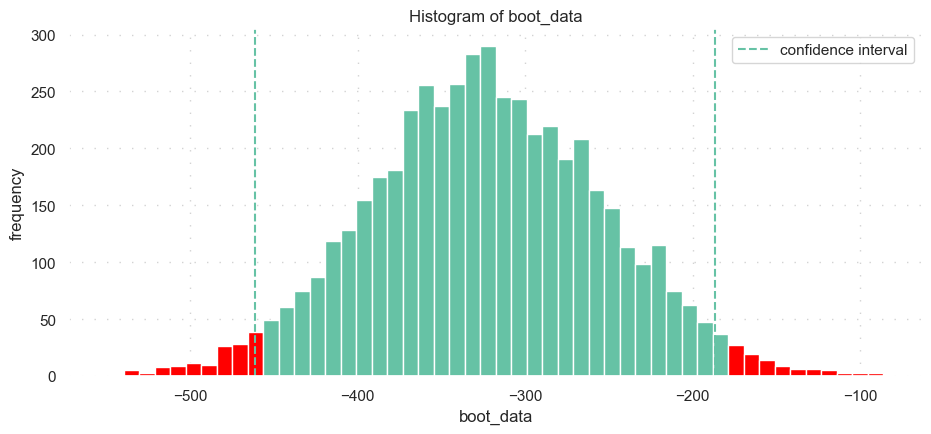

P-value =  3.616e-06


In [48]:
np.random.seed(40)
b_data = get_bootstrap(ARPPAU_a, ARPPAU_b, statistic = np.mean)
print(f'P-value =  {b_data["p_value"]:.4}')

### вывод 
95% доверительнвй интервал не включает ноль, средние чеки покупателей значимо различаются 

In [49]:
print(f'Изменение ARPPAU % = {(( metric.ARPPAU[1] - metric.ARPPAU[0]) / metric.ARPPAU[0])*100:.4}%')
print(f'Изменение ARPPAU в у.е. = {np.mean(metric.ARPPAU[1]) * (( metric.ARPPAU[1] - metric.ARPPAU[0]) / metric.ARPPAU[0]):.4}')

Изменение ARPPAU % = 34.52%
Изменение ARPPAU в у.е. = 433.5


### ARPAU (все)

In [50]:
ARPAU_a = ab_t[(ab_t.grp == 'A')].revenue
ARPAU_b = ab_t[(ab_t.grp == 'B')].revenue

In [51]:
desc(pd.DataFrame(ARPAU_b))

,count,mean,std,min,25%,50%,75%,max,nunique,isna,dtypes
revenue,6793.0,57.864567,313.197487,0.0,0.0,0.0,0.0,4650.0,34,0,float64


In [52]:
desc(pd.DataFrame(ARPAU_b))

,count,mean,std,min,25%,50%,75%,max,nunique,isna,dtypes
revenue,6793.0,57.864567,313.197487,0.0,0.0,0.0,0.0,4650.0,34,0,float64


Тест на нормальность распределения средних A группы: W = 0.998 , p-value = 0.000 => не нормально
Тест на нормальность распределения средних B группы: W = 1.000 , p-value = 0.707 => нормальное


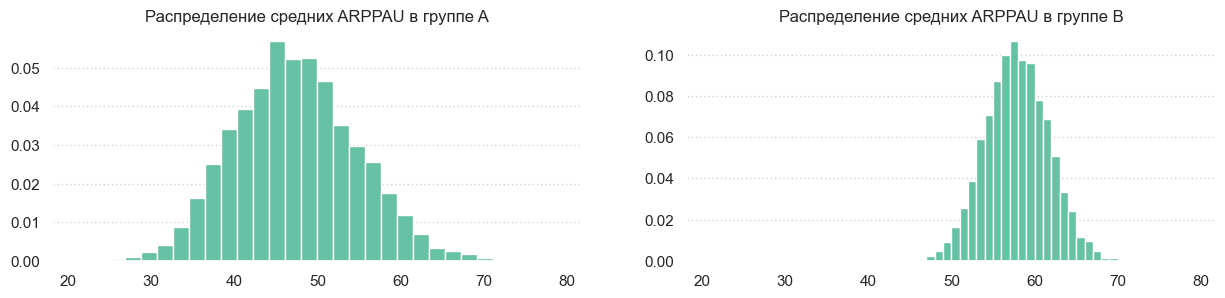

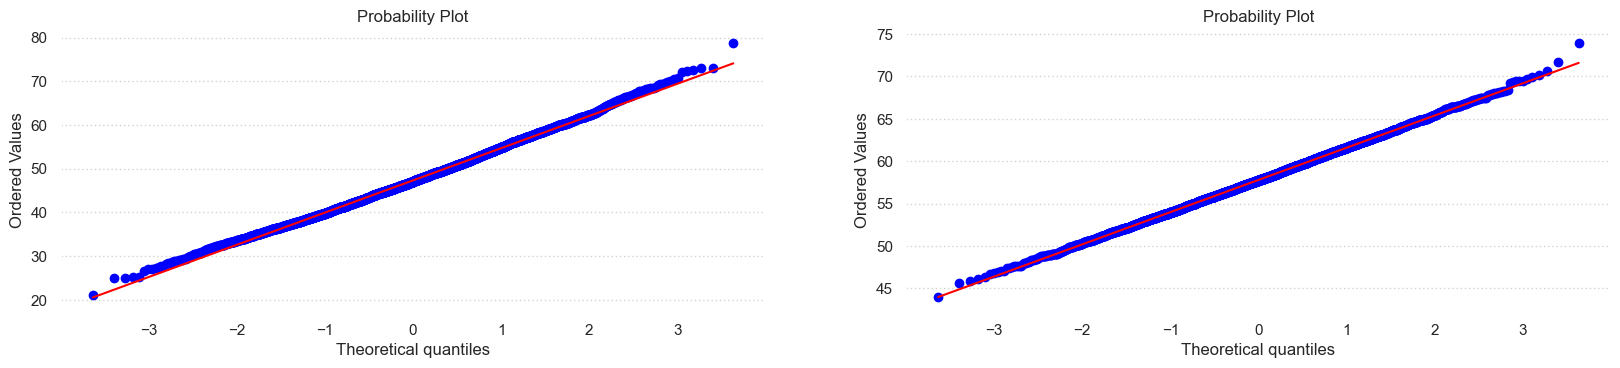

In [75]:
np.random.seed(42)
population_ARPPAU = ab_t.copy()
population_ARPPAU['revenue'] = ab_t['revenue']
extr_a, extr_b = is_norm(population_ARPPAU, metric_name = 'ARPPAU', data = True)

In [76]:
#асимметрия A
print('асимметрия A', (sum((extr_a - np.mean(extr_a))**3) / len(extr_a)) / np.std(extr_a)**3)
#асимметрия B
print('асимметрия B',(sum((extr_b - np.mean(extr_b))**3) / len(extr_b)) / np.std(extr_b)**3)

#коэф эксцесса A
print('коэф эксцесса A', (sum((extr_a - np.mean(extr_a))**4) / len(extr_a)) / np.std(extr_a)**4)
#коэф эксцесса B
print('коэф эксцесса B', (sum((extr_b - np.mean(extr_b))**4) / len(extr_b)) / np.std(extr_b)**4)

асимметрия A 0.18606264430944358
асимметрия B 0.05845416634621262
коэф эксцесса A 2.9825211084476533
коэф эксцесса B 2.988361065685142


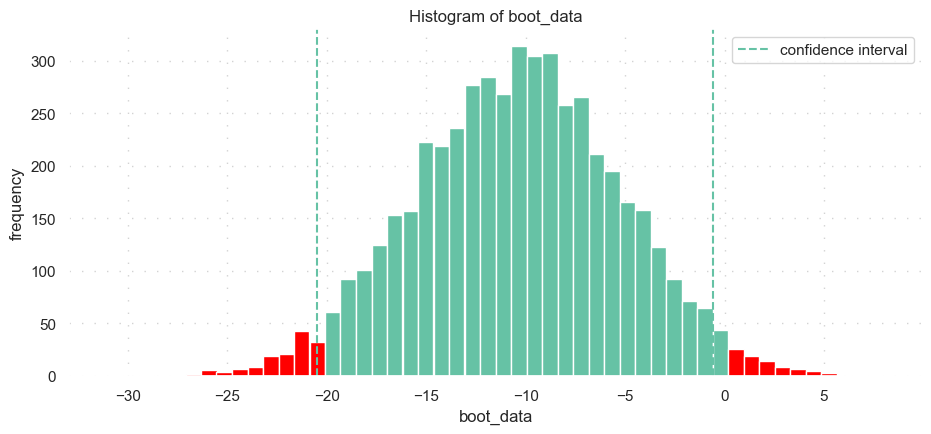

P-value =  0.0428


In [55]:
np.random.seed(40)
b_data = get_bootstrap(ARPAU_a, ARPAU_b, statistic = np.mean)
print(f'P-value =  {b_data["p_value"]:.4}')

In [56]:
#np.log2(population_ARPAU.metric)

### 1.3.3 Являются ли эти различия ARPAU статистически значимыми?
    Да, P значение хоть и не значительно, но превосходит установленный нами уровень значимости 0.05
    95% доверительный интервал не включает ноль, средние чеки покупателей значимо различаются



## H0: о равенстве медиан в двух группах

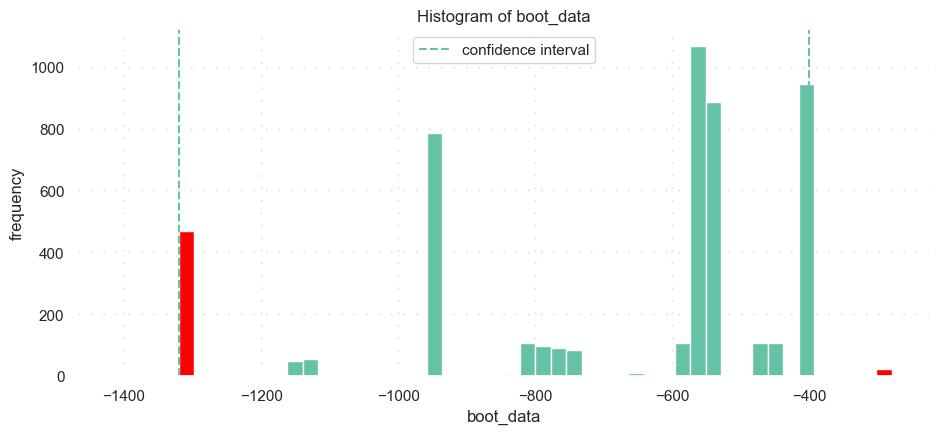

In [57]:
np.random.seed(40)
b_data = get_bootstrap(ARPPAU_a, ARPPAU_b, boot_it = 5000, statistic = np.median)

ДИ для медиан так же не включает 0 

### Поправка на множественные сравнения

Так как мы множества раз сравнивали метрики состоящие, по сути, из одних и тех же значений, мы могли столкнуться с проблемой множественных сравнений.
Например Поправка Бонферрони предполагает уменьшить альфу / m, где m количество сравнений.
Но так как в ходе сравнений были получены очень сильные отклонения P-value 3.616e-06 для ARPPAU_a, то применять поправки нет смысла.


# Вывод
## 1.3.4 Стоит ли запускать новую механику на всех пользователей?
    В процессе анализа были найдены статистически значимые различия в поведении платящих пользователей. (P-value 3.616e-06, Средний чек + 34.52%)
    Но, прежде чем утверждать о положительности этих изменений следует детально изучить эти покупки и попытаться объяснить,
    чем конкретно они были вызваны, какое влияние эти изменения могут принести в долгосрочной перспективе. 
    Нет ли ошибки в системе разделения на выборки. Соотношение размеров тест контроль, а также огромное количество 
    одинаковых покупок только в пилоте заставляют сомневаться в правильности сбора данных.


## Задание 2. SQL
### 2.1 Очень усердные ученики.

### 2.1.1 Условие

    Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое
    маленькое задание называется "горошиной".

    Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

In [58]:
import pandahouse as pdh

In [59]:
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [60]:
def get_select(q):
    return pdh.read_clickhouse(query = q, connection=connection_default)

#### Дана таблица default.peas:
    # Название атрибута   Тип атрибута   Смысловое значение
    # st_id               int            ID ученика
    # timest              timestamp      Время решения карточки
    # correct             bool           Правильно ли решена горошина?
    # subject             text           Дисциплина, в которой находится горошина

    Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов.

    NB! Под усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц.

In [61]:
q='''
SELECT COUNT (DISTINCT st_id) AS DILIGENT_COUNT 
FROM 
    ( SELECT  
            st_id,
            sum(correct) AS correct
        FROM default.peas
        WHERE 
            (year(timest), month(timest)) = ( SELECT max(year(timest)), max(month(timest)) FROM default.peas)
        GROUP BY st_id
        HAVING correct >= 20
    ) AS A
'''

q1 = get_select(q)
q1.head()

,DILIGENT_COUNT
0,136


## 2.2 Оптимизация воронки

### 2.2.1 Условие

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

### 2.2.2 Задача

    Дана таблицы: default.peas (см. выше), default.studs:
    
    Название атрибута	Тип атрибута   Смысловое значение
    st_id	            int 	       ID ученика
    test_grp	         text 	      Метка ученика в данном эксперименте

    и default.final_project_check:

    Название атрибута   Тип атрибута    Смысловое значение
    st_id               int             ID ученика
    sale_time           timestamp       Время покупки
    money               int             Цена, по которой приобрели данный курс
    subject             text            Дисциплина, на которую приобрели полный доступ

### Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

    ARPU  (средний доход с пользователя)
    ARPAU (средний доход с активного пользователя)
    CR в покупку 
    СR активного пользователя в покупку 
    CR пользователя из активности по математике (subject = 'math') в покупку курса по математике
    ARPU считается относительно всех пользователей, попавших в группы.

##### Активным считается пользователь, за все время решивший больше 10 задач правильно в любых дисциплинах.
##### Активным по математике считается пользователь, за все время решивший 2 или больше задач правильно по математике.

In [62]:
q = '''
DESCRIBE TABLE default.studs;
'''
get_select(q)

,name,type,default_type,default_expression,comment,codec_expression,ttl_expression
0,st_id,String,,,,,
1,test_grp,String,,,,,


In [63]:
q = '''
SELECT * FROM default.studs
LIMIT 5
'''
get_select(q)

,st_id,test_grp
0,100379,pilot
1,101432,control
2,104818,pilot
3,104885,pilot
4,104966,pilot


In [64]:
q = '''
DESCRIBE TABLE final_project_check;
'''
get_select(q)

,name,type,default_type,default_expression,comment,codec_expression,ttl_expression
0,st_id,String,,,,,
1,sale_time,DateTime64(3),,,,,
2,money,UInt32,,,,,
3,subject,String,,,,,


In [65]:
q = '''
WITH final_tab AS
(
    SELECT * FROM 
        (
        SELECT st_id,
                test_grp, 
                money, 
                buyed_math 
        FROM default.studs AS s
        LEFT JOIN (
            SELECT st_id, 
                MAX(IF(subject = 'Math', 1, 0)) AS buyed_math,
                SUM(money) AS money
                FROM default.final_project_check
            GROUP BY st_id
                ) c ON s.st_id = c.st_id
        ) AS st_pays
    LEFT JOIN (
        SELECT 
            st_id, 
            IF(SUM(correct) >= 2 AND MAX(solved_math) > 0, 1, 0) AS math_act,
            IF(SUM(correct) > 10, 1, 0) AS active
        FROM 
            (
            SELECT st_id, 
                    SUM(correct) AS correct, 
                    IF(subject= 'Math', 1, 0) AS solved_math FROM default.peas
            GROUP BY st_id, subject
            ) AS act
        GROUP BY st_id
        ) AS active ON st_pays.st_id = active.st_id
)
SELECT 
    test_grp,
    ROUND(SUM(money) / count(st_id),2)  AS ARPU,
    ROUND(sumIf(money, active = 1) / countIf(st_id, active = 1),2) AS ARPAU,
    ROUND(countIf(distinct st_id, money > 0) / count(distinct st_id),4) AS CR,
    ROUND(countIf(distinct st_id, money > 0 and active = 1 ) / countIf(st_id, active = 1),4) AS CR_active,
    ROUND(countIf(distinct st_id, buyed_math = 1 and math_act = 1 ) / countIf(st_id, math_act = 1),4) AS CR_math
FROM final_tab
GROUP BY test_grp

'''
sql_metrics = get_select(q)

In [66]:
sql_metrics

,test_grp,ARPU,ARPAU,CR,CR_active,CR_math
0,control,4540.98,10393.70,0.0492,0.1102,0.0577
1,pilot,11508.47,29739.58,0.1085,0.2604,0.0909


## Задание 3. Python
### 3.1 Задача

    Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки 
    могут отличаться) и на основании дополнительных параметров пересчитывать метрики.
    
    Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [67]:
def metrics(path = None):
    '''
    Без указания path метрики считаются по стандарту из 3х фалов (groups.csv, active_studs.csv, checks.csv) из папки с ноутбуком
    При указании path = True, к метрикам добавятся данные из 'group_add.csv' из папки с ноутбуком
    Так же можно указать другой путь в path
    '''
    groups = pd.read_csv('groups.csv', sep=';', names=['st_id','test_grp'], header=0)
    active_studs = pd.read_csv('active_studs.csv', names=['st_id'], header=0)
    checks = pd.read_csv('checks.csv', sep=';', names=['st_id','rev'], header=0)

    groups['test_grp'] = groups.test_grp.apply(lambda x : 'pilot' if x == 'B' else 'control')

    # А – контроль, B – целевая группа (pilot)
    if path:
        if path == True:
            path = 'group_add.csv'
        groups_add = pd.read_csv(path, sep=',', names=['st_id','test_grp'], header=0)
        groups_add['test_grp'] = groups_add.test_grp.apply(lambda x : 'pilot' if x == 'B'or x == 'pilot' else 'control')
        df = pd.concat([groups_add, groups])
    else:
        df = groups
        
    df.drop_duplicates()

    df.loc[df.st_id.isin(active_studs.st_id),'is_active'] = 1
    df.fillna(0,inplace=True)

    df = pd.merge(df, checks.groupby('st_id',as_index=False).rev.sum(), on = 'st_id', how='left').fillna(0)

    df.loc[(df.is_active == 1)&(df.rev > 0),'active_rev'] = df[(df.is_active == 1)&(df.rev > 0)].rev
    df.fillna(0,inplace=True)

    df_temp = df.groupby('test_grp',as_index=False).agg(total_studs=('st_id','nunique'), 
                                                       active_studs=('is_active','sum'),
                                                       buys=('rev', lambda x : sum(x > 0)), 
                                                       active_buys=('active_rev', lambda x : sum(x > 0)), 
                                                       total_rev=('rev','sum'), 
                                                       active_rev=('active_rev','sum')
                                               )
    CR = pd.DataFrame(df_temp.active_buys /  df_temp.active_studs, columns=['CR_active'])
    ARPU = pd.DataFrame(df_temp.active_rev /  df_temp.active_studs, columns=['ARPAU'])
    ARPPU = pd.DataFrame(df_temp.active_rev /  df_temp.active_buys, columns=['ARPPAU'])
    return pd.concat([df_temp,CR,ARPU,ARPPU], axis=1)

### Приставка "active" значит участвует в А/Б тесте

In [68]:
metrics()

,test_grp,total_studs,active_studs,buys,active_buys,total_rev,active_rev,CR_active,ARPAU,ARPPAU
0,control,14671,1535.0,107,78,92096.0000,72820.0000,0.050814,47.439739,933.589744
1,pilot,59813,6793.0,433,313,479330.0036,393074.0035,0.046077,57.864567,1255.827487


In [69]:
metrics('group_add.csv')

,test_grp,total_studs,active_studs,buys,active_buys,total_rev,active_rev,CR_active,ARPAU,ARPPAU
0,control,14693,1538.0,107,78,92096.0000,72820.0000,0.050715,47.347204,933.589744
1,pilot,59883,6803.0,434,314,481230.0036,394974.0035,0.046156,58.058798,1257.878992


#### Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [70]:
def show_metrics(path=None):
    '''path путь к новым данным как и в metrics()'''
    
    def enum(ax):
        labels = []
        for p in ax.patches:
            h = round(p.get_height(),3)
            labels.append(str(h) if h else '')
        return ax, labels
    
    sns.set(palette='Set2', 
            rc={"axes.grid":True,
            "grid.color": "lightgrey",
            'grid.linestyle': (0, (1, 2)),
            'axes.grid.axis':'y',
            'axes.facecolor': 'white'})
    
    a = metrics()
    
    f, ax = plt.subplots(1,3,figsize=(15,2))
    f.suptitle('old data',  y = 1.1)
    
    sns.barplot(x = [a.test_grp[0], a.test_grp[1]], y=[a.CR_active[0],a.CR_active[1]], ax=ax[0])
    ax[0].fill_between([0.4,0.6],
                     [a.CR_active[0],a.CR_active[1]], alpha=0.6)
    
    sns.barplot(x = [a.test_grp[0], a.test_grp[1]], y=[a.ARPAU[0],a.ARPAU[1]], ax=ax[1])
    ax[1].fill_between([0.4,0.6],
                     [a.ARPAU[0],a.ARPAU[1]], alpha=0.6)
    
    sns.barplot(x = [a.test_grp[0], a.test_grp[1]], y=[a.ARPPAU[0],a.ARPPAU[1]], ax=ax[2])
    ax[2].fill_between([0.4,0.6],
                     [a.ARPPAU[0],a.ARPPAU[1]], alpha=0.6)
    
    ax[0].set_title('CR',pad=0)
    ax[1].set_title('ARPAU',pad=0)
    ax[2].set_title('ARPPAU',pad=0)
    for i in range(3):
        axs, labels = enum(ax[i])
        axs.bar_label(axs.containers[0], labels=labels)

    if path:    
        try:
            if path == True:
                path = 'group_add.csv'

            b = metrics(path)
            f, ax = plt.subplots(1,3,figsize=(15,3))
            f.suptitle('new data', y = 1.05)

            sns.barplot(x = [b.test_grp[0], b.test_grp[1]], y=[b.CR_active[0],b.CR_active[1]], ax=ax[0])
            ax[0].fill_between([0.4,0.6],
                             [b.CR_active[0],b.CR_active[1]], alpha=0.6)

            sns.barplot(x = [b.test_grp[0], b.test_grp[1]], y=[b.ARPAU[0],b.ARPAU[1]], ax=ax[1])
            ax[1].fill_between([0.4,0.6],
                             [b.ARPAU[0],b.ARPAU[1]], alpha=0.6)

            sns.barplot(x = [b.test_grp[0], b.test_grp[1]], y=[b.ARPPAU[0],b.ARPPAU[1]], ax=ax[2])
            ax[2].fill_between([0.4,0.6],
                             [b.ARPPAU[0],b.ARPPAU[1]], alpha=0.6)

            ax[0].set_title('CR',pad=0)
            ax[1].set_title('ARPAU',pad=0)
            ax[2].set_title('ARPPAU',pad=0)
            for i in range(3):
                axs, labels = enum(ax[i])
                axs.bar_label(axs.containers[0], labels=labels)
        except:
            print('')
    
    return a

,test_grp,total_studs,active_studs,buys,active_buys,total_rev,active_rev,CR_active,ARPAU,ARPPAU
0,control,14671,1535.0,107,78,92096.0000,72820.0000,0.050814,47.439739,933.589744
1,pilot,59813,6793.0,433,313,479330.0036,393074.0035,0.046077,57.864567,1255.827487


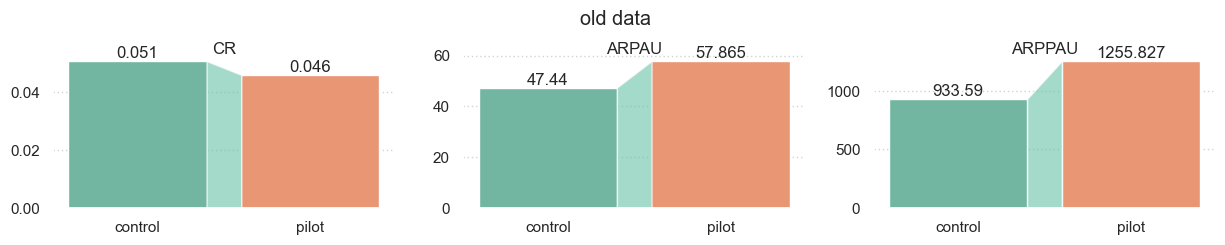

In [71]:
show_metrics()

,test_grp,total_studs,active_studs,buys,active_buys,total_rev,active_rev,CR_active,ARPAU,ARPPAU
0,control,14671,1535.0,107,78,92096.0000,72820.0000,0.050814,47.439739,933.589744
1,pilot,59813,6793.0,433,313,479330.0036,393074.0035,0.046077,57.864567,1255.827487


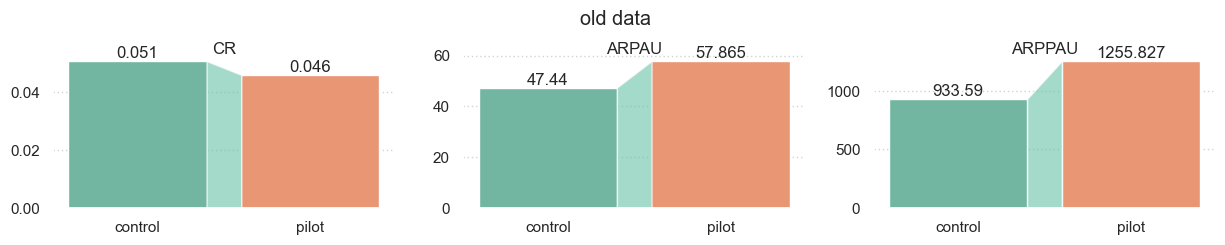

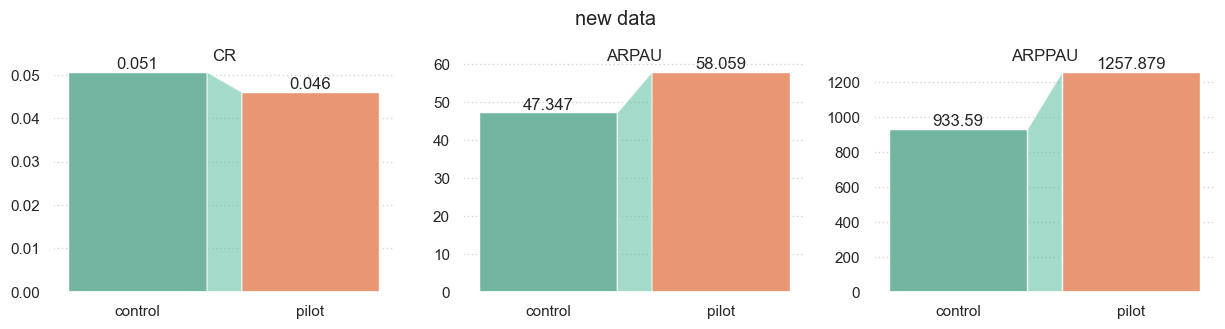

In [72]:
show_metrics(path = 'group_add.csv')